In [1]:
import subprocess
import re

proc = subprocess.Popen(['powershell', 'Get-WmiObject win32_desktopmonitor;'], stdout=subprocess.PIPE)
res = proc.communicate()
monitors = re.findall('(?s)\r\nName\s+:\s(.*?)\r\n', res[0].decode("utf-8"))
print(monitors)

['Generic PnP Monitor']


-----------------------
----------------------
BCI EXPERIEMENT
-----------------------
- EEG data quality and visualisation 
- AUDIO:
    - Initial Test 
    - EEG visualisation
    - trial 1, trial 2
- VIBRO:
    - Initial Test 
    - EEG visualisation
    - trial 1, trial 2
- SHAPE: 
    - Initial Test 
    - EEG visualisation
    - trial 1, trial 2


In [1]:
# #pwd
# #--
# # import os
# # os.chdir('C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP') 
# import sys
# sys.path.append("..\\")
# sys.path.append("C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\utils")
# sys.path.append("C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\experiments")
# print(sys.path)

'c:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\experiments'

In [2]:
import os
import experiment_lib 
import basic_analysis_lib as data
import time

#TODO EVERY TIME
subject_id = "15"
record_duration = 60*7

print("BEGINNING OF EXPERIMENT FOR SUBJECT NUMBER", subject_id)

pygame 2.1.2 (SDL 2.0.18, Python 3.7.15)
Hello from the pygame community. https://www.pygame.org/contribute.html
 -> New merged file at  C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\ShapeVisual\07\1\synched_data.csv
BEGINNING OF EXPERIMENT FOR SUBJECT NUMBER 15


In [3]:
# -------------- EEG visualisation and data quality check

# good: EEG quality (signal-to-noise ratio): [ 0.16827877  0.19154625  0.09322894  0.17048355 41.15032666]
# noise in TP9: EEG quality (signal-to-noise ratio): [ 0.69171177  0.12949748  0.17856085  0.28869263 98.07525926]

data.check_quality()

Looking for an EEG stream...
Start acquiring data at time  1693838877.236002
Creating RawArray with float64 data, n_channels=5, n_times=172081
    Range : 0 ... 172080 =      0.000 ...   672.188 secs
Ready.


<string>:4: FutureWarning: NOTE: psd_multitaper() is a deprecated function. Function ``psd_multitaper()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="multitaper")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.
c:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\experiments\basic_analysis_lib.py:141: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = mne.time_frequency.psd_multitaper(raw, fmax=30, n_jobs=1, verbose=0)


EEG quality (signal-to-noise ratio): [0.26254087 0.22191572 0.28416902 0.44061041 0.46422838]


-------------------
*AUDIO EXPERIMENT*
-------------------

In [5]:
# ----------------------- CHECK EEG 

# COMMAND: muselsl view --version 2

data.check_quality()

Looking for an EEG stream...
Start acquiring data at time  1693838407.8467731
Creating RawArray with float64 data, n_channels=5, n_times=2389
    Range : 0 ... 2388 =      0.000 ...     9.328 secs
Ready.
EEG quality (signal-to-noise ratio): [ 0.1210584   0.194331    0.03850226  0.22281707 20.18839809]


Experiment Started at time  1693841810.1475456
Looking for an EEG stream...
Start writing data at time  1693841810.1485481
Start acquiring data at time  1693841810.6536252
left
arrow
right
arrow
right
arrow
Stopped writing data at time  1693841830.2451966
Stopped acquiring data at time  1693841835.6927252
Number of blue circles reported is:  4 Number of actual blue circles is:  4
Experiment Completed at time  1693841841.085935
541.1476 	WARNING 	User requested fullscreen with size [1600  900], but screen is actually [1536, 864]. Using actual size
All events recorderd
 -> New merged file at  C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\test\data_muse_synch.csv


Loading these files: 

C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\test\data_muse_raw.csv




['TP9', 'AF7', 'AF8', 'TP10', 'stim']
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=6229
    Range : 0 ... 6228 =      0.000 ...    24.328 secs
Ready.
Filte

c:\Users\matil\miniconda3\envs\eeg-notebooks\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


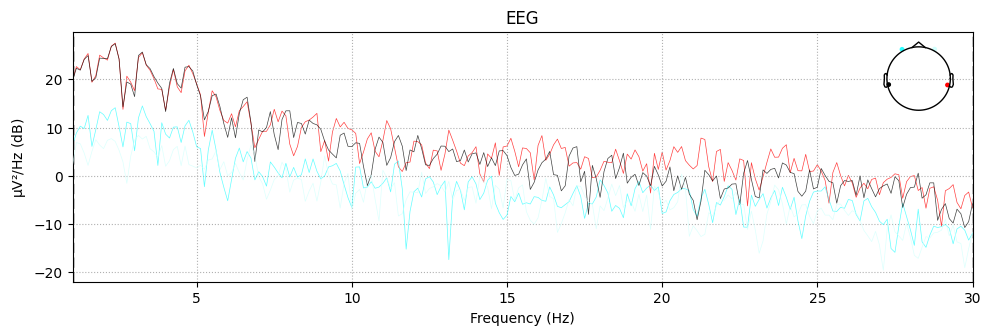

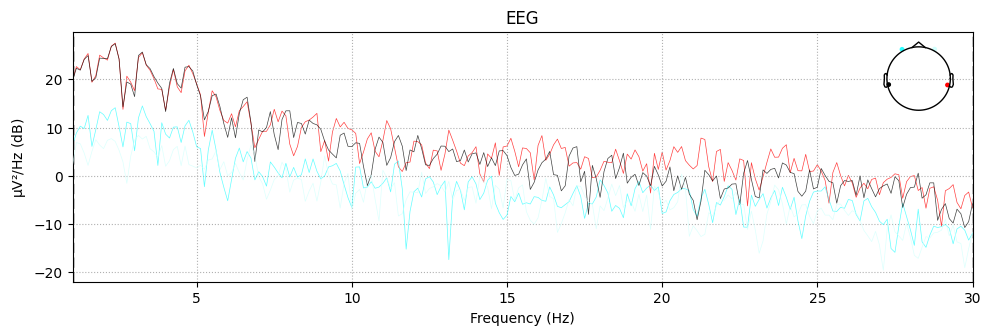

In [4]:
# ------------------------ Initial Test 

type = "audio"
duration = 20
file_name_raw = "C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_raw.csv"
file_name_marked = "C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_marked.csv"
file_name_synched ="C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_synch.csv"

experiment_lib.run_trial(type, duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched =file_name_synched)
raw = data.load_csv_as_raw([file_name_raw ],256, [1,2,3, 4])
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30)

In [5]:
# -----------------------------TRIAL 1

type = "AudioVisual"

session_n = "1"

data_path = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data', type, subject_id, session_n)
file_name_raw = os.path.join(data_path, 'eeg.csv') 
file_name_marked = os.path.join(data_path, 'markers.csv')
file_name_synched = os.path.join(data_path, 'synched_data.csv')


experiment_lib.run_trial(type= "audio", duration = record_duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched = file_name_synched)



Experiment Started at time  1693841855.7470176
Looking for an EEG stream...
Start writing data at time  1693841855.7490206
Start acquiring data at time  1693841856.251309
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
left
arrow
right
arrow
left
arrow
right
arrow
right
arrow
right
arrow
right
arrow
left
arrow
right
arrow
right
arrow
right
arrow
left
arrow
left
arrow
left
arrow
right
arrow
right
arrow
right
arrow
left
arrow
right
arrow
left
arrow
left
arrow
right
arrow
right
arrow
right
arrow
left
arrow
right
arrow
right
arrow
left
arrow
right
arrow
left
arrow
right
arrow
left
arrow
left
arrow
right
arrow
left
arrow
right
arrow
left
arrow
right
arrow
right
arrow
left
arrow
left
arrow
right
arrow
right
arrow
left
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
left
arrow
right
arrow
right
arrow
left
arrow
left
arrow
right
arrow
left
arrow
left
arrow
right
arrow
right
arrow
left
arrow
right
arrow
left
arrow
right
arrow
left
arrow
right
arrow
left

In [22]:
# -----------------------------TRIAL 2

type = "AudioVisual"

session_n = "2"

data_path = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data', type, subject_id, session_n)
file_name_raw = os.path.join(data_path, 'eeg.csv')
file_name_marked = os.path.join(data_path, 'markers.csv')
file_name_synched = os.path.join(data_path, 'synched_data.csv')


experiment_lib.run_trial(type= "audio", duration = record_duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched = file_name_synched)


Experiment Started at time  1684436440.1666534
Looking for an EEG stream...
Start writing data at time  1684436440.1681583
Start acquiring data at time  1684436440.6692138
right
arrow
right
arrow
left
arrow
left
arrow
right
arrow
right
arrow
left
arrow
left
arrow
right
arrow
left
arrow
left
arrow
left
arrow
left
arrow
left
arrow
right
arrow
left
arrow
right
arrow
left
arrow
left
arrow
left
arrow
left
arrow
left
arrow
right
arrow
right
arrow
left
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
left
arrow
right
arrow
right
arrow
left
arrow
right
arrow
right
arrow
left
arrow
left
arrow
left
arrow
right
arrow
left
arrow
right
arrow
left
arrow
left
arrow
right
arrow
left
arrow
left
arrow
left
arrow
left
arrow
right
arrow
left
arrow
right
arrow
left
arrow
left
arrow
right
arrow
right
arrow
left
arrow
right
arrow
left
arrow
left
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
left
arrow
left
arrow
right
arrow
right
arrow
right
arrow


------------------
*VIBRO EXPERIMENT*
--------------------

In [ ]:
# ----------------------- CHECK EEG 

# COMMAND: muselsl view --version 2

data.check_quality()

In [ ]:
# -------------------------- check direction
# python C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\experiments\vibro_visualoddball\old\vibrate_serialpin.py

Experiment Started at time  1684434442.852521
Looking for an EEG stream...
Start writing data at time  1684434442.8535213
Start acquiring data at time  1684434443.3566716
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Stopped writing data at time  1684434465.3232617
Stopped acquiring data at time  1684434468.3653507
Number of blue circles reported is:  1 Number of actual blue circles is:  1
Experiment Completed at time  1684434472.0374556
10446.0161 	WARNING 	User requested fullscreen with size [1600  900], but screen is actually [1536, 864]. Using actual size
All events recorderd
 -> New merged file at  C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\test\data_muse_synch.csv


Loading these files: 

C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\test\data_muse_raw.csv




['TP9', 'AF7', 'AF8', 'TP10', 'stim']
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=622

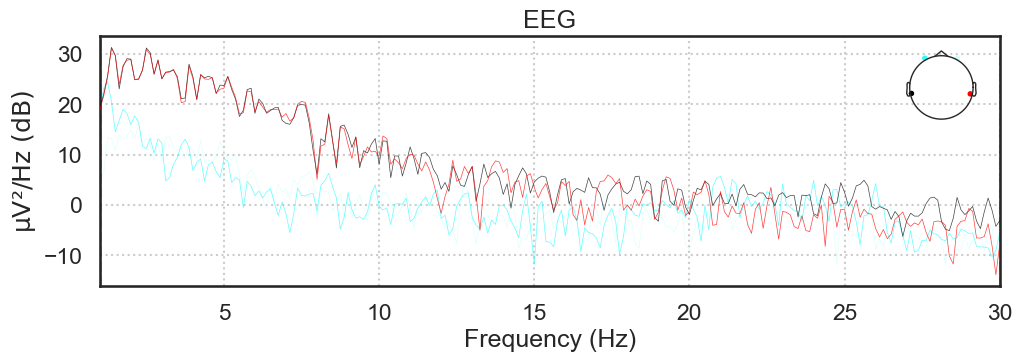

In [18]:
# ------------------------ Initial Test

type = "vibro"
duration = 20
file_name_raw = "C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_raw.csv"
file_name_marked = "C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_marked.csv"
file_name_synched ="C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_synch.csv"

experiment_lib.run_trial(type, duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched =file_name_synched)

raw = data.load_csv_as_raw([file_name_raw ],256, [1,2,3, 4])
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30)

In [3]:
# -----------------------------TRIAL 1

type = "VibroVisual"

session_n = "1"

data_path = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data', type, subject_id, session_n)
file_name_raw = os.path.join(data_path, 'eeg.csv')
file_name_marked = os.path.join(data_path, 'markers.csv')
file_name_synched = os.path.join(data_path, 'synched_data.csv')


experiment_lib.run_trial(type = "vibro", duration = record_duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched = file_name_synched)



Experiment Started at time  1693841289.6942763
Looking for an EEG stream...
Start writing data at time  1693841289.6952767
Start acquiring data at time  1693841290.1995776
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vib

In [20]:
# -----------------------------TRIAL 2

type = "VibroVisual"

session_n = "2"

data_path = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data', type, subject_id, session_n)
file_name_raw = os.path.join(data_path, 'eeg.csv')
file_name_marked = os.path.join(data_path, 'markers.csv')
file_name_synched = os.path.join(data_path, 'synched_data.csv')


experiment_lib.run_trial(type = "vibro", duration = record_duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched = file_name_synched)


Experiment Started at time  1684435002.8198066
Looking for an EEG stream...
Start writing data at time  1684435002.8218212
Start acquiring data at time  1684435003.3245232
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  le

------------
*SHAPE EXPERIMENT*
---------------

In [ ]:
# ----------------------- CHECK EEG 

# COMMAND: muselsl view --version 2

data.check_quality()

Experiment Started at time  1693840421.981182
Looking for an EEG stream...
Start writing data at time  1693840421.9821782
Start acquiring data at time  1693840422.4846463
Move  right
right
arrow
Move  left
left
arrow
Stopped writing data at time  1693840443.6802564
Stopped acquiring data at time  1693840447.5058975
Number of blue circles reported is:  2 Number of actual blue circles is:  2
Experiment Completed at time  1693840456.7487895
133.4174 	WARNING 	User requested fullscreen with size [1600  900], but screen is actually [1536, 864]. Using actual size
All events recorderd
 -> New merged file at  C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\test\data_muse_synch.csv


Loading these files: 

C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\test\data_muse_raw.csv




['TP9', 'AF7', 'AF8', 'TP10', 'stim']
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=6229
    Range : 0 ... 6228 =      0.000 ...    24.328 secs
R

c:\Users\matil\miniconda3\envs\eeg-notebooks\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


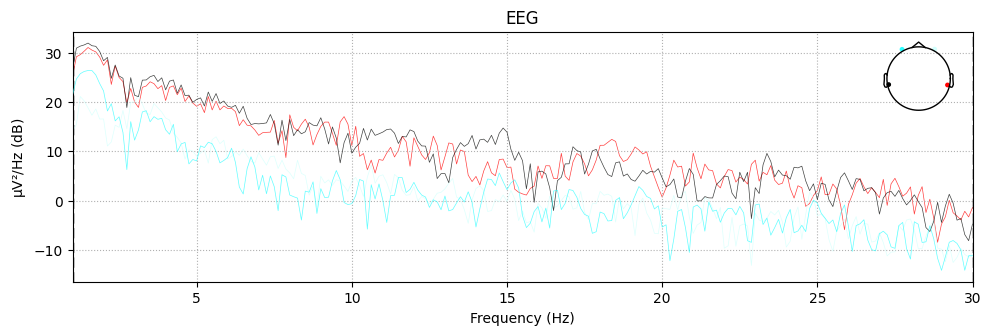

In [5]:
# ------------------------ Initial Test

type = "shape"
duration = 20
file_name_raw = "C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_raw.csv"
file_name_marked = "C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_marked.csv"
file_name_synched ="C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_synch.csv"

experiment_lib.run_trial(type, duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched =file_name_synched)

raw = data.load_csv_as_raw([file_name_raw ],256, [1,2,3, 4])
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30)

In [6]:
# -----------------------------TRIAL 1

type = "ShapeVisual"

session_n = "1"

data_path = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data', type, subject_id, session_n)

file_name_raw = os.path.join(data_path, 'eeg.csv')
file_name_marked = os.path.join(data_path, 'markers.csv')
file_name_synched = os.path.join(data_path, 'synched_data.csv')

experiment_lib.run_trial(type = "shape", duration = record_duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched = file_name_synched)
#03 - 66
#todo synch part 03

Experiment Started at time  1693840517.754482
Looking for an EEG stream...
Start writing data at time  1693840517.7557383
Start acquiring data at time  1693840518.2582078
Move  left
left
arrow
Move  right
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
Move  right
right
arrow
Move  right
right
arrow
Move  right
Move  right
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
Move  right
left
arrow
Move  left
left
arrow
Move  left
Move  right
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
Move  right
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
Move  right
right
arrow
Move  left
left
a

In [25]:
# -----------------------------TRIAL 2

type = "ShapeVisual"

session_n = "2"

data_path = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data', type, subject_id, session_n)

file_name_raw = os.path.join(data_path, 'eeg.csv')
file_name_marked = os.path.join(data_path, 'markers.csv')
file_name_synched = os.path.join(data_path, 'synched_data.csv')

experiment_lib.run_trial(type = "shape", duration = record_duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched = file_name_synched)


Experiment Started at time  1684437539.1970072
Looking for an EEG stream...
Start writing data at time  1684437539.2000067
Start acquiring data at time  1684437539.702664
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
left
arrow
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
Move  right
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left